In [1]:
import glob
import os

import matplotlib.pyplot as plt
import matplotlib as mpl
import netCDF4 as nc
import numpy as np

from hot_encoding_utils import form_of_ice, one_hot_m1, one_hot_m2


from scipy.interpolate import RectBivariateSpline

%matplotlib inline

In [2]:
pwd

'C:\\Alissa\\ENSG\\ING2\\STAGE\\Dev\\satellite-data-pipeline\\asip_v2'

In [3]:
%cd "D:/training"

D:\training


In [4]:
file = '20180404T205505_S1B_AMSR2_Icechart-Greenland-CentralWest.nc'
stp=20
ds = nc.Dataset(file)
n,p=ds['nersc_sar_secondary'].shape
sar2 = ds['nersc_sar_secondary'][::stp, ::stp]
ic = ds['polygon_icechart'][::stp, ::stp]

n,p= ic.shape

en_values_array=np.zeros((n,p,4))+np.nan
mat= np.zeros(ic.shape)+np.nan 

In [5]:
map_id_to_variable_values=dict()
for id_and_corresponding_variable_values in ds['polygon_codes'][1:]:
    id_val_splitted = id_and_corresponding_variable_values.split(";")
    #print(id_val_splitted)
    [ct, ca, sa, fa, cb, sb, fb, cc, sc] = list(map(int, id_val_splitted[1:10]))
    result = one_hot_m1(ct,ca,sa,cb,sb,fb,cc,sc)
    map_id_to_variable_values.update({int(id_val_splitted[0]): result})
#     map_id_to_variable_values.update({int(id_val_splitted[0]): id_val_splitted[1:]})
    print("----- input \n",ct,ca,sa,cb,sb,fb,cc,sc, "\n-----output \n",result,"\n")  

----- input 
 92 -9 87 -9 -9 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 92 30 91 70 87 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 92 10 91 60 87 -9 30 83 
-----output 
 [1, 0, 0, 0] 

----- input 
 50 20 93 20 91 5 10 87 
-----output 
 [0, 0, 1, 0] 

----- input 
 92 30 91 70 87 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 80 30 91 30 87 4 20 87 
-----output 
 [0, 0, 1, 0] 

----- input 
 80 20 93 20 91 5 40 87 
-----output 
 [0, 0, 1, 0] 

----- input 
 92 -9 91 -9 -9 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 92 80 91 20 87 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 30 10 87 10 83 2 10 82 
-----output 
 [0, 1, 0, 0] 

----- input 
 91 40 93 50 91 6 10 87 
-----output 
 [0, 0, 1, 0] 

----- input 
 91 60 93 40 91 6 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 92 -9 91 -9 -9 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 



In [6]:
for id_value, variable_belong_to_id in map_id_to_variable_values.items():
        # each loop changes all locations of values_array (that have the very
        # 'id_value') to its corresponding value inside 'variable_belong_to_id'
        
        print(en_values_array[ic == id_value, :].shape)
        en_values_array[ic == id_value, :] = np.byte(np.array(variable_belong_to_id))

(46, 4)
(456, 4)
(1482, 4)
(1831, 4)
(381, 4)
(530, 4)
(4903, 4)
(4671, 4)
(4029, 4)
(1049, 4)
(5089, 4)
(46533, 4)
(7010, 4)


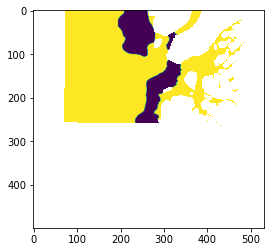

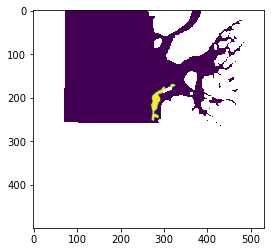

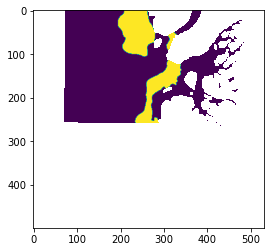

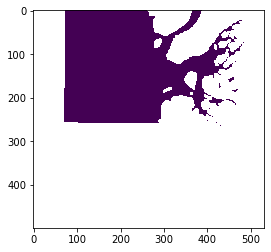

In [7]:
for i in range(4):
    plt.imshow(en_values_array[:,:,i])
    plt.show()

----- input 
 92 -9 87 -9 -9 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 92 30 91 70 87 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 92 10 91 60 87 -9 30 83 
-----output 
 [1, 0, 0, 0] 

----- input 
 50 20 93 20 91 5 10 87 
-----output 
 [0, 0, 1, 0] 

----- input 
 92 30 91 70 87 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 80 30 91 30 87 4 20 87 
-----output 
 [0, 0, 1, 0] 

----- input 
 80 20 93 20 91 5 40 87 
-----output 
 [0, 0, 1, 0] 

----- input 
 92 -9 91 -9 -9 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 92 80 91 20 87 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 30 10 87 10 83 2 10 82 
-----output 
 [0, 1, 0, 0] 

----- input 
 91 40 93 50 91 6 10 87 
-----output 
 [0, 0, 1, 0] 

----- input 
 91 60 93 40 91 6 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 92 -9 91 -9 -9 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 



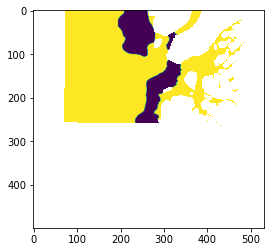

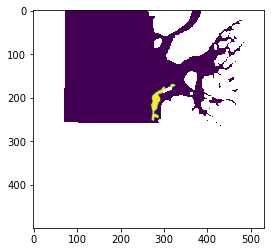

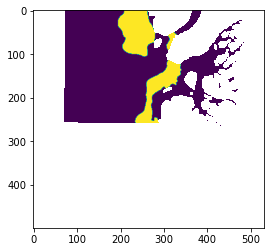

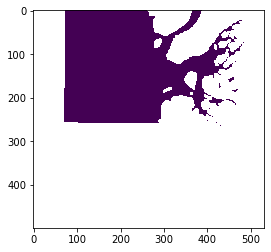

----- input 
 92 -9 91 -9 -9 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 92 -9 91 -9 -9 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 92 -9 91 -9 -9 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 70 10 98 40 87 3 20 83 
-----output 
 [0, 1, 0, 0] 

----- input 
 30 10 95 10 93 4 10 91 
-----output 
 [0, 0, 1, 0] 

----- input 
 92 -9 91 -9 -9 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 92 -9 91 -9 -9 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 30 10 95 10 93 4 10 91 
-----output 
 [0, 0, 1, 0] 

----- input 
 20 10 95 10 93 4 -9 91 
-----output 
 [0, 0, 1, 0] 

----- input 
 2 -9 -9 -9 -9 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 30 10 95 10 93 4 10 91 
-----output 
 [0, 0, 1, 0] 

----- input 
 20 10 95 10 93 4 -9 91 
-----output 
 [0, 0, 1, 0] 

----- input 
 91 40 95 30 93 4 30 91 
-----output 
 [0, 0, 1, 0] 

----- input 
 2 -9 -9 -9 -9 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 



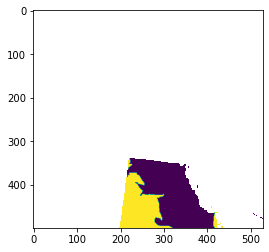

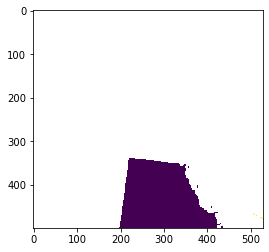

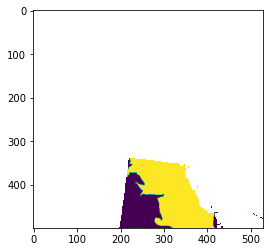

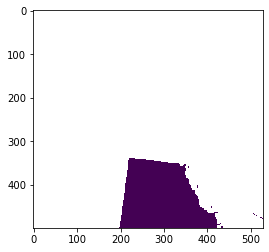

----- input 
 40 10 87 30 83 2 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 90 10 95 50 87 3 30 83 
-----output 
 [0, 1, 0, 0] 

----- input 
 91 20 95 50 87 3 30 83 
-----output 
 [0, 1, 0, 0] 

----- input 
 20 10 87 10 83 2 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 2 -9 -9 -9 -9 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 



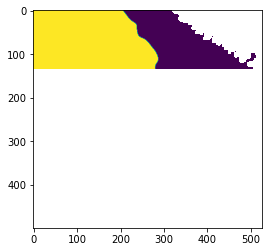

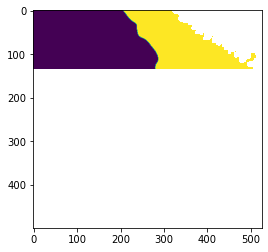

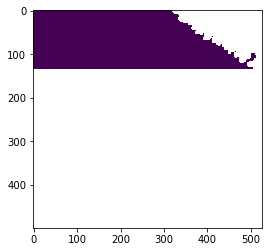

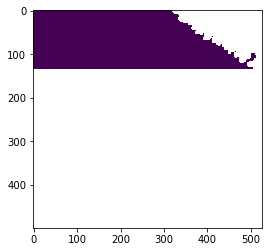

----- input 
 92 30 91 70 87 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 92 20 87 80 83 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 92 20 87 70 83 -9 10 82 
-----output 
 [1, 0, 0, 0] 

----- input 
 90 20 91 50 87 5 20 83 
-----output 
 [0, 1, 0, 0] 

----- input 
 10 -9 87 -9 -9 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 92 20 87 70 83 -9 10 82 
-----output 
 [1, 0, 0, 0] 

----- input 
 70 30 83 30 82 3 10 81 
-----output 
 [0, 1, 0, 0] 

----- input 
 30 20 83 10 82 2 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 92 20 87 80 83 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 90 -9 83 -9 -9 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 92 20 87 80 83 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 92 20 87 80 83 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 50 10 83 30 82 3 10 81 
-----output 
 [0, 1, 0, 0] 

----- input 
 90 -9 83 -9 -9 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 91 -9 83 -9 -9 -9 -9 -9 
-----output 


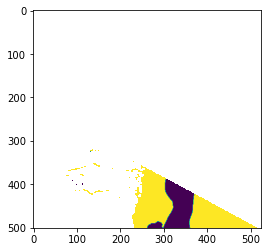

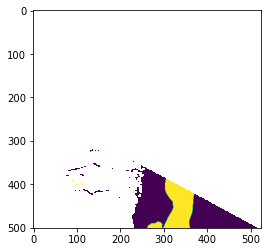

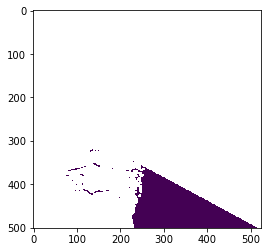

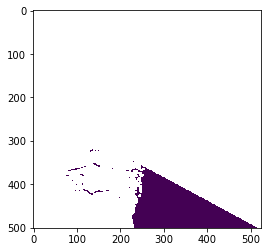

----- input 
 92 20 98 80 91 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 92 10 93 90 91 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 92 70 91 30 87 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 92 10 93 90 91 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 92 20 98 20 93 -9 60 91 
-----output 
 [0, 0, 1, 0] 

----- input 
 91 20 87 50 83 4 30 82 
-----output 
 [1, 0, 0, 0] 

----- input 
 91 80 91 20 87 6 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 91 50 91 30 87 5 20 83 
-----output 
 [1, 0, 0, 0] 

----- input 
 92 20 93 80 91 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 92 20 98 20 93 -9 60 91 
-----output 
 [0, 0, 1, 0] 



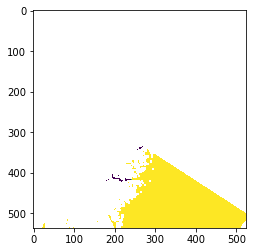

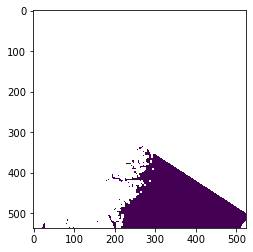

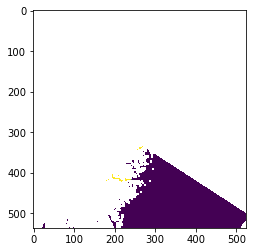

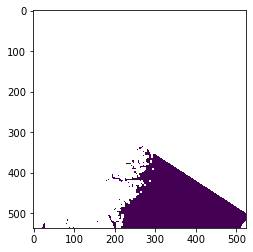

----- input 
 20 10 95 10 87 3 -9 83 
-----output 
 [0, 1, 0, 0] 

----- input 
 92 20 95 60 91 -9 20 83 
-----output 
 [0, 1, 0, 0] 

----- input 
 92 20 95 60 91 -9 20 83 
-----output 
 [0, 1, 0, 0] 

----- input 
 2 -9 -9 -9 -9 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 20 10 95 10 87 3 -9 83 
-----output 
 [0, 1, 0, 0] 

----- input 
 30 10 95 10 91 3 10 87 
-----output 
 [0, 0, 1, 0] 

----- input 
 92 -9 87 -9 -9 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 20 10 95 10 87 3 -9 83 
-----output 
 [0, 1, 0, 0] 

----- input 
 20 10 95 10 87 3 -9 83 
-----output 
 [0, 1, 0, 0] 

----- input 
 91 10 98 90 87 5 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 10 -9 95 -9 -9 3 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 91 50 95 30 91 4 20 87 
-----output 
 [0, 0, 1, 0] 

----- input 
 1 -9 98 -9 -9 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 92 10 95 80 87 -9 10 83 
-----output 
 [0, 1, 0, 0] 

----- input 
 10 -9 87 -9 -9 -9 -9 -9 
-----output 
 [1, 0

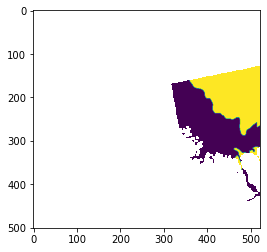

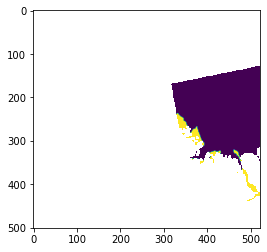

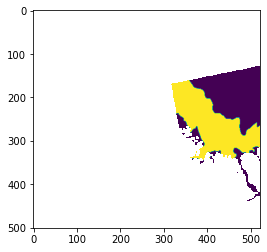

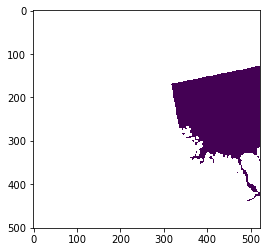

----- input 
 92 20 98 70 93 -9 10 91 
-----output 
 [0, 0, 1, 0] 

----- input 
 92 10 98 70 93 -9 20 91 
-----output 
 [0, 0, 1, 0] 

----- input 
 92 20 98 70 93 -9 10 91 
-----output 
 [0, 0, 1, 0] 

----- input 
 92 30 98 60 93 -9 10 91 
-----output 
 [0, 0, 1, 0] 

----- input 
 91 20 95 50 93 6 30 91 
-----output 
 [0, 0, 1, 0] 

----- input 
 92 -9 93 -9 -9 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 92 50 95 40 91 -9 20 87 
-----output 
 [0, 0, 1, 0] 

----- input 
 92 -9 93 -9 -9 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 92 -9 93 -9 -9 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 92 50 95 40 91 -9 20 87 
-----output 
 [0, 0, 1, 0] 

----- input 
 90 60 95 20 93 6 10 91 
-----output 
 [0, 0, 1, 0] 

----- input 
 91 40 95 40 91 4 20 87 
-----output 
 [0, 0, 1, 0] 

----- input 
 30 10 93 10 91 4 10 87 
-----output 
 [0, 0, 1, 0] 

----- input 
 2 -9 -9 -9 -9 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 



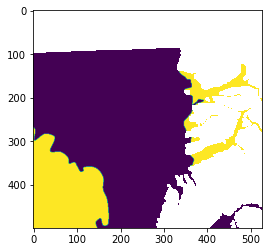

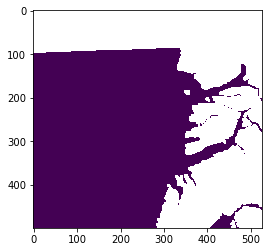

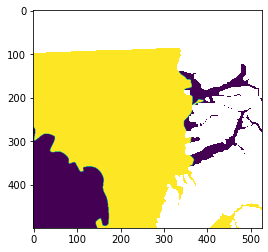

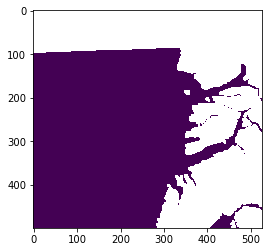

----- input 
 20 10 93 10 91 4 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 92 60 93 40 91 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 92 60 93 40 91 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 50 20 95 20 93 4 10 91 
-----output 
 [0, 0, 1, 0] 

----- input 
 92 60 93 40 91 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 91 20 95 50 93 5 30 91 
-----output 
 [0, 0, 1, 0] 

----- input 
 92 60 93 40 91 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 92 60 93 40 91 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 92 60 93 40 91 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 50 20 95 20 93 4 10 91 
-----output 
 [0, 0, 1, 0] 

----- input 
 92 60 93 40 91 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 92 60 93 40 91 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 92 20 98 80 91 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 91 50 95 40 93 5 10 91 
-----output 
 [0, 0, 1, 0] 

----- input 
 50 20 95 20 93 4 10 91 
-----output 
 [

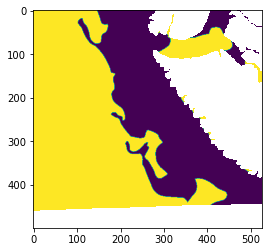

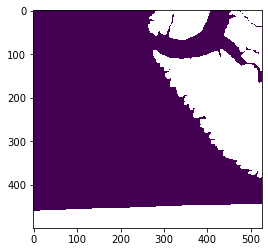

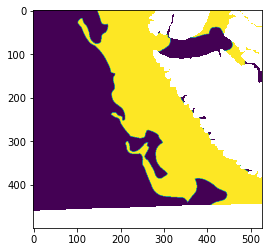

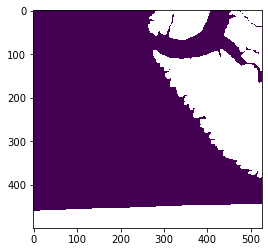

----- input 
 91 40 91 60 87 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 80 30 95 30 93 3 20 91 
-----output 
 [0, 0, 1, 0] 

----- input 
 2 -9 -9 -9 -9 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 70 20 95 30 93 3 20 91 
-----output 
 [0, 0, 1, 0] 

----- input 
 91 50 95 30 93 4 20 91 
-----output 
 [0, 0, 1, 0] 

----- input 
 80 10 98 30 95 4 40 93 
-----output 
 [0, 0, 1, 0] 

----- input 
 50 20 98 10 95 4 20 91 
-----output 
 [0, 0, 1, 0] 

----- input 
 20 10 95 10 93 4 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 91 40 95 40 93 4 20 91 
-----output 
 [0, 0, 1, 0] 

----- input 
 92 10 95 60 91 -9 30 83 
-----output 
 [0, 1, 0, 0] 

----- input 
 80 40 95 30 93 4 10 91 
-----output 
 [0, 0, 1, 0] 

----- input 
 40 10 95 10 93 3 20 91 
-----output 
 [0, 0, 1, 0] 

----- input 
 80 40 95 30 93 4 10 91 
-----output 
 [0, 0, 1, 0] 

----- input 
 91 40 95 40 93 4 20 91 
-----output 
 [0, 0, 1, 0] 

----- input 
 90 10 95 40 93 6 40 91 
-----output 
 [0, 0, 1

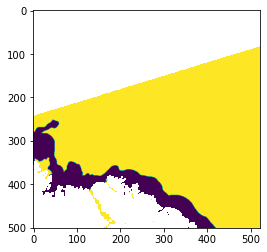

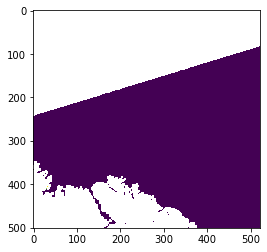

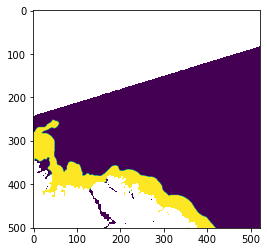

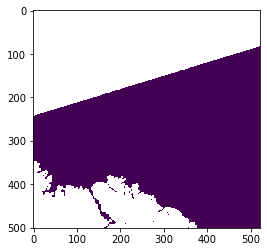

----- input 
 30 20 98 10 87 3 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 91 70 98 30 83 2 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 91 40 95 50 93 6 10 91 
-----output 
 [0, 0, 1, 0] 

----- input 
 91 40 95 40 93 5 20 91 
-----output 
 [0, 0, 1, 0] 

----- input 
 20 10 93 10 91 3 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 2 -9 -9 -9 -9 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 2 -9 -9 -9 -9 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 90 30 95 40 93 4 20 91 
-----output 
 [0, 0, 1, 0] 

----- input 
 91 40 95 50 93 6 10 91 
-----output 
 [0, 0, 1, 0] 



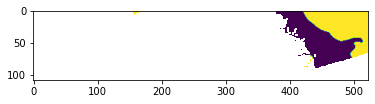

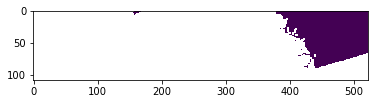

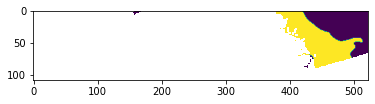

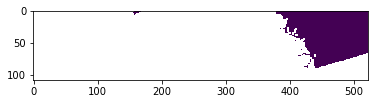

----- input 
 80 20 98 20 91 3 40 87 
-----output 
 [0, 0, 1, 0] 

----- input 
 70 30 95 20 93 4 20 87 
-----output 
 [0, 0, 1, 0] 

----- input 
 30 10 98 20 87 2 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 91 50 95 30 93 4 20 91 
-----output 
 [0, 0, 1, 0] 

----- input 
 92 10 95 60 91 -9 30 83 
-----output 
 [0, 1, 0, 0] 

----- input 
 91 50 98 30 91 3 20 87 
-----output 
 [0, 0, 1, 0] 

----- input 
 70 30 95 20 93 4 20 87 
-----output 
 [0, 0, 1, 0] 

----- input 
 91 40 91 60 87 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 80 20 98 20 91 3 40 87 
-----output 
 [0, 0, 1, 0] 

----- input 
 40 10 95 20 93 3 10 91 
-----output 
 [0, 0, 1, 0] 

----- input 
 91 50 98 30 91 3 20 87 
-----output 
 [0, 0, 1, 0] 

----- input 
 30 10 98 20 87 2 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 30 10 98 20 87 2 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 91 90 87 10 83 3 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 91 50 98 30 91 3 20 87 
-----output 
 [0, 0, 1

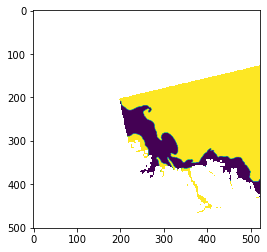

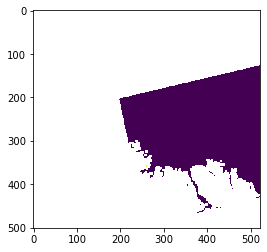

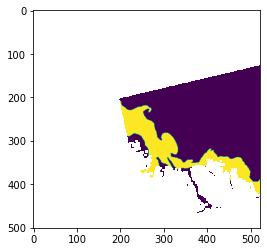

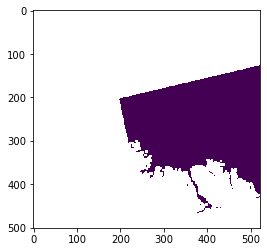

----- input 
 10 -9 98 -9 -9 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 91 90 98 10 83 3 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 92 40 98 60 87 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 92 40 98 60 87 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 30 -9 98 -9 -9 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 91 -9 87 -9 -9 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 20 10 98 10 87 3 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 90 80 87 10 83 3 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 91 80 98 20 87 3 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 92 -9 87 -9 -9 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 91 80 98 20 87 3 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 30 20 98 10 87 3 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 80 40 98 40 91 3 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 80 40 98 40 91 3 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 40 20 91 20 87 5 -9 -9 
-----output 
 [1, 

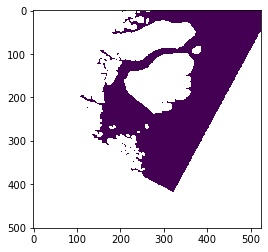

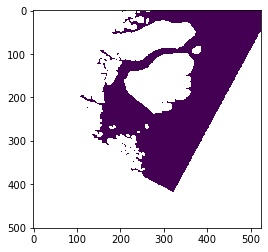

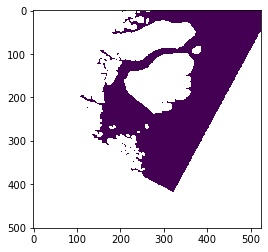

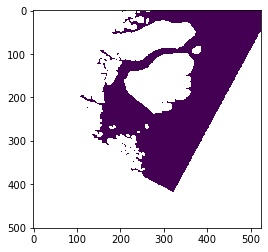

----- input 
 30 20 95 10 93 2 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 50 30 95 20 93 2 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 90 60 95 30 93 2 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 90 60 95 30 93 2 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 1 -9 95 -9 -9 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 30 20 95 10 93 2 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 1 -9 95 -9 -9 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 10 -9 95 -9 -9 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 70 50 95 20 93 2 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 10 -9 95 -9 -9 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 50 30 95 20 93 2 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 91 60 95 40 93 2 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 2 -9 -9 -9 -9 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 2 -9 -9 -9 -9 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 



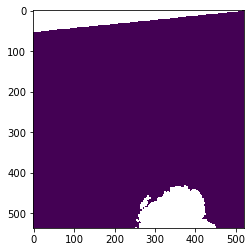

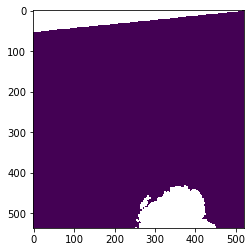

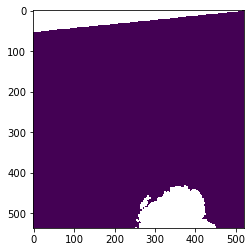

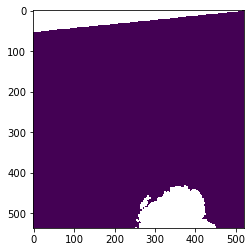

----- input 
 10 -9 95 -9 -9 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 50 30 95 20 93 2 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 10 -9 95 -9 -9 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 70 40 95 30 93 2 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 10 -9 98 -9 -9 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 70 -9 98 -9 -9 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 91 60 95 40 93 2 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 10 -9 98 -9 -9 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 90 -9 98 -9 -9 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 2 -9 -9 -9 -9 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 91 60 95 40 93 2 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 10 -9 98 -9 -9 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 70 -9 98 -9 -9 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 2 -9 -9 -9 -9 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 



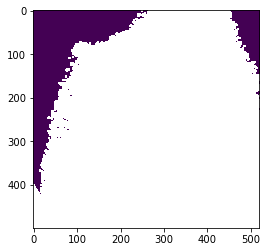

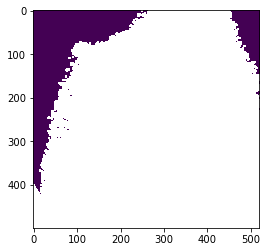

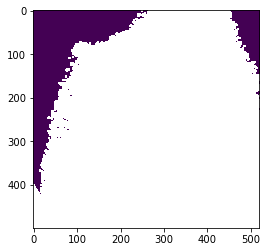

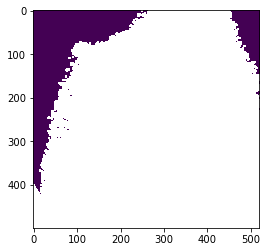

In [9]:
ifiles = sorted(glob.glob('*.nc'))
stp = 20

dir_ = "D:/training/reconstructs_folder"
ifiles_recon = glob.glob(dir_+'/*.npz')
# print(ifiles_recon)
# print(np.load(ifiles_recon[0]).files)
for i in range(len(ifiles)):
    #print(ifile)
    ifile = ifiles[i]
    ds = nc.Dataset(ifile)
    n,p=ds['nersc_sar_secondary'].shape
    sar2 = ds['nersc_sar_secondary'][::stp, ::stp]
    ic = ds['polygon_icechart'][::stp, ::stp]
    
    n,p= ic.shape

    en_values_array=np.zeros((n,p,4))+np.nan
    
    map_id_to_variable_values=dict()
    for id_and_corresponding_variable_values in ds['polygon_codes'][1:]:
        id_val_splitted = id_and_corresponding_variable_values.split(";")
        #print(id_val_splitted)
        [ct, ca, sa, fa, cb, sb, fb, cc, sc] = list(map(int, id_val_splitted[1:10]))
        result = one_hot_m1(ct,ca,sa,cb,sb,fb,cc,sc)
        map_id_to_variable_values.update({int(id_val_splitted[0]): result})
    #     map_id_to_variable_values.update({int(id_val_splitted[0]): id_val_splitted[1:]})
        print("----- input \n",ct,ca,sa,cb,sb,fb,cc,sc, "\n-----output \n",result,"\n")
    
    
    for id_value, variable_belong_to_id in map_id_to_variable_values.items():
        # each loop changes all locations of values_array (that have the very
        # 'id_value') to its corresponding value inside 'variable_belong_to_id'
               
#         print(en_values_array[ic == id_value, :].shape)
        en_values_array[ic == id_value, :] = np.byte(np.array(variable_belong_to_id))
    
    for i in range(4):
        plt.imshow(en_values_array[:,:,i])
        plt.show()